In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torchvision
import torch
import time

import matplotlib.pyplot as plt

import numpy as np
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

In [2]:
data_dir = './data/letters/'
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]
# TODO: Define transforms for the training data and testing data
train_transforms = transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(means, stds,),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((224,224)),
#         transforms.Grayscale(num_output_channels=1),
    ]
)
test_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(means, stds,),
        transforms.RandomHorizontalFlip(),
        transforms.Resize((224,224)),
#         transforms.Grayscale(num_output_channels=1),
    ]
)

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
val_data = datasets.ImageFolder(data_dir + '/val', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)
valloader = torch.utils.data.DataLoader(val_data, batch_size=1, shuffle=True)

In [3]:
from networks.letters import LettersNetwork
model = LettersNetwork()

In [4]:
# PATH = './models/letters.pth'
# # torch.save(model.state_dict(), PATH)
# model = LettersNetwork()
# model.load_state_dict(torch.load(PATH))

In [5]:
# TODO: Train a model with a pre-trained network
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

model.train()
model.to(device)
epochs = 100
print_every = 10
steps = 0
for e in range(epochs):
    running_loss = 0
    for ii, (inputs, labels) in enumerate(trainloader):
        model
        # Move input and label tensors to the GPU
        inputs, labels = inputs.to(device), labels.to(device)

        start = time.time()

        outputs = model.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
        optimizer.step()
        
        running_loss += loss.item()
        steps += 1
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

/home/lpetrov/projects/courses/blender/letters/.venv/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1/100...  Loss: 1.0986
Epoch: 1/100...  Loss: 1.0877


KeyboardInterrupt: 

In [7]:
PATH = './models/letters.pth'
torch.save(model.state_dict(), PATH)
net = LettersNetwork()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


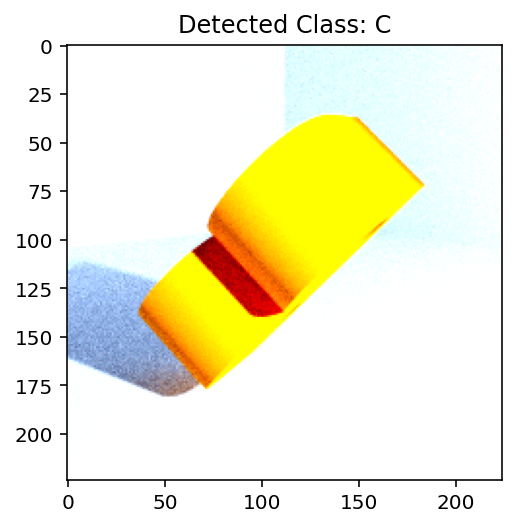

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def map_prediction(results):
    results = results.to('cpu').detach().numpy()
    results = results.squeeze()
    indx = np.where(results == np.max(results))[0][0]
    return indx

def get_prediction(model, image, label):
    orig = image.squeeze().permute(1,2,0).numpy()
    image = image.to(device)
    features = model(image).unsqueeze(1)
    plt.imshow(orig, cmap='gray')
    indx = map_prediction(features)
    plt.title(f'Detected Class: {classes[indx]}')
    return features
model = net
model.eval()
model.to(device)
classes = ['A', 'B', 'C']
orig_image, label = next(iter(valloader))
prediction = get_prediction(model, orig_image, label)